In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sagemaker
import boto3
import matplotlib.pyplot as plt 
pd.set_option('display.max_columns',None) # To display all columns
pd.set_option('display.max_rows',None) # To display all columns
client = boto3.client('s3')
import feather
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
path1= 's3://haseebdata/EDNET DATA/Ednet feather files/KT1.ftr'
path3 = 's3://haseebdata/EDNET DATA/Ednet feather files/KT3.ftr'
path4 = 's3://haseebdata/EDNET DATA/Ednet feather files/KT4.ftr'

In [3]:
#KT1 = pd.read_feather(path1)
KT3 = pd.read_feather(path3)
#KT4 = pd.read_feather(path4)

In [14]:
questions = pd.read_csv('s3://haseebdata/EDNET DATA/EDNET Content CSV/questions.csv')

In [6]:
KT1.head()

,timestamp,solving_id,question_id,user_answer,elapsed_time,user_iD
0,1565096190868,1,q5012,b,38000,1
1,1565096221062,2,q4706,c,24000,1
2,1565096293432,3,q4366,b,68000,1
3,1565096339668,4,q4829,a,42000,1
4,1565096401774,5,q6528,b,59000,1


In [5]:
KT3.head()

,timestamp,action_type,item_id,source,user_answer,platform,user_iD
0,2019-08-06 12:55:51.269,enter,b3544,diagnosis,None,mobile,1
1,2019-08-06 12:56:27.972,respond,q5012,diagnosis,b,mobile,1
2,2019-08-06 12:56:34.904,submit,b3544,diagnosis,None,mobile,1
3,2019-08-06 12:56:35.001,enter,b3238,diagnosis,None,mobile,1
4,2019-08-06 12:56:58.682,respond,q4706,diagnosis,c,mobile,1


In [8]:
KT4.head()

,timestamp,action_type,item_id,cursor_time,source,user_answer,platform,user_iD
0,1565096151269,enter,b3544,NaN,diagnosis,None,mobile,1
1,1565096187972,respond,q5012,NaN,diagnosis,b,mobile,1
2,1565096194904,submit,b3544,NaN,diagnosis,None,mobile,1
3,1565096195001,enter,b3238,NaN,diagnosis,None,mobile,1
4,1565096218682,respond,q4706,NaN,diagnosis,c,mobile,1


In [9]:
K1_userid_counts = KT1.user_iD.value_counts()
mask = K1_userid_counts >= 30
KT1_userids = mask[mask].index

K1 = KT1[KT1.user_iD.isin(KT1_userids)]

In [6]:
K3_userid_counts = KT3.user_iD.value_counts()
mask = K3_userid_counts >= 30
KT3_userids = mask[mask].index

K3 = KT3[KT3.user_iD.isin(KT3_userids)]

In [11]:
K4_userid_counts = KT4.user_iD.value_counts()
mask = K4_userid_counts >= 30
KT4_userids = mask[mask].index

K4 = KT4[KT4.user_iD.isin(KT4_userids)]

In [13]:
K1.head()

,timestamp,solving_id,question_id,user_answer,elapsed_time,user_iD
0,1565096190868,1,q5012,b,38000,1
1,1565096221062,2,q4706,c,24000,1
2,1565096293432,3,q4366,b,68000,1
3,1565096339668,4,q4829,a,42000,1
4,1565096401774,5,q6528,b,59000,1


In [7]:
K3.head()

,timestamp,action_type,item_id,source,user_answer,platform,user_iD
0,2019-08-06 12:55:51.269,enter,b3544,diagnosis,None,mobile,1
1,2019-08-06 12:56:27.972,respond,q5012,diagnosis,b,mobile,1
2,2019-08-06 12:56:34.904,submit,b3544,diagnosis,None,mobile,1
3,2019-08-06 12:56:35.001,enter,b3238,diagnosis,None,mobile,1
4,2019-08-06 12:56:58.682,respond,q4706,diagnosis,c,mobile,1


In [15]:
K4.head()

,timestamp,action_type,item_id,cursor_time,source,user_answer,platform,user_iD
0,1565096151269,enter,b3544,NaN,diagnosis,None,mobile,1
1,1565096187972,respond,q5012,NaN,diagnosis,b,mobile,1
2,1565096194904,submit,b3544,NaN,diagnosis,None,mobile,1
3,1565096195001,enter,b3238,NaN,diagnosis,None,mobile,1
4,1565096218682,respond,q4706,NaN,diagnosis,c,mobile,1


In [16]:
K3.shape

(86227211, 7)

In [17]:
K4.shape

(128486846, 8)

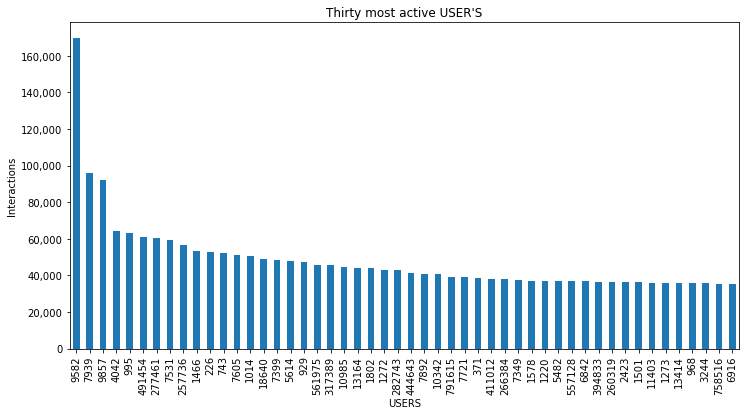

In [41]:
cids = K3.user_iD.value_counts()[:50]

fig = plt.figure(figsize=(12,6))
ax = cids.plot.bar()
plt.title("Thirty most active USER'S")
plt.xticks(rotation=90)
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ','))) #add thousands separator
plt.xlabel('USERS')
plt.ylabel('Interactions')
plt.show()


In [ ]:
A_userid_counts = K3.user_iD.value_counts()
mask = A_userid_counts >= 30
filtered_userids = mask[mask].index

A = K3[K3.user_iD.isin(filtered_userids)]

In [ ]:
cids = K3.user_iD.value_counts()[:50]

fig = plt.figure(figsize=(12,6))
ax = cids.plot.bar()
plt.title("Thirty most active USER'S")
plt.xticks(rotation=90)
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ','))) #add thousands separator
plt.xlabel('USERS')
plt.ylabel('Interactions')
plt.show()


In [10]:
K = KT3.loc[KT3['action_type'].isin(['respond'])]

In [11]:
K.head()

,timestamp,action_type,item_id,source,user_answer,platform,user_iD
1,2019-08-06 12:56:27.972,respond,q5012,diagnosis,b,mobile,1
4,2019-08-06 12:56:58.682,respond,q4706,diagnosis,c,mobile,1
7,2019-08-06 12:58:10.094,respond,q4366,diagnosis,b,mobile,1
10,2019-08-06 12:58:57.361,respond,q4829,diagnosis,a,mobile,1
13,2019-08-06 12:59:55.328,respond,q6528,diagnosis,b,mobile,1


In [12]:
K['correct'] = 0

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [13]:
K.head()

,timestamp,action_type,item_id,source,user_answer,platform,user_iD,correct
1,2019-08-06 12:56:27.972,respond,q5012,diagnosis,b,mobile,1,0
4,2019-08-06 12:56:58.682,respond,q4706,diagnosis,c,mobile,1,0
7,2019-08-06 12:58:10.094,respond,q4366,diagnosis,b,mobile,1,0
10,2019-08-06 12:58:57.361,respond,q4829,diagnosis,a,mobile,1,0
13,2019-08-06 12:59:55.328,respond,q6528,diagnosis,b,mobile,1,0


In [15]:
# loop - if user answers == correct answer, then df1['correct'][_]= 1
    length_B = B['user_id'].count()
    count = 0
    for i in range(length_B):
        if B['user_answer'][count] == questions['correct_answer'][count]:
            B['correct'][count] = 1
        count+=1

    # create new 'score' column = sum of rows/ sum of correct (1)
    total_u1 = B['correct'].count()
    correct_u1 = B[B['correct'] == 1].count()
    score = correct_u1[0]/total_u1
    B['score'] = score"""

IndentationError: unexpected indent (<ipython-input-15-e28580f010c4>, line 2)

In [22]:
length_K = K['user_iD'].count()
count = 0
for i in range(length_K):
    if K['user_answer'][count] == questions['correct_answer'][count]:
        K['correct'][count] == 1
        count+=1

KeyError: 0